<a href="https://colab.research.google.com/github/Rk-Pudasaini/Data_Analysis/blob/main/Kalimati_tarkari_price_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
#df = pd.read_csv('/content/Kalimati_Tarkari_Dataset.csv')
df = pd.read_csv('https://raw.githubusercontent.com/Rk-Pudasaini/Data_Analysis/main/Kalimati_Tarkari_Price_Analysis/Kalimati_Tarkari_Dataset.csv')
df.head()

<ipython-input-1-e75b8efb487e>:3: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://raw.githubusercontent.com/Rk-Pudasaini/Data_Analysis/main/Kalimati_Tarkari_Price_Analysis/Kalimati_Tarkari_Dataset.csv')


,Commodity,Date,Unit,Minimum,Maximum,Average
0,Tomato Big(Nepali),6/16/2013,Kg,35,40,37.5
1,Tomato Small(Local),6/16/2013,Kg,26,32,29.0
2,Potato Red,6/16/2013,Kg,20,21,20.5
3,Potato White,6/16/2013,Kg,15,16,15.5
4,Onion Dry (Indian),6/16/2013,Kg,28,30,29.0


In [2]:
df.tail()

,Commodity,Date,Unit,Minimum,Maximum,Average
280857,Tomato Small(Indian),9/28/2023,KG,Rs 45.00,Rs 55.00,Rs 50.00
280858,Tomato Small(Local),9/28/2023,KG,Rs 50.00,Rs 60.00,Rs 55.00
280859,Tomato Small(Tunnel),9/28/2023,KG,Rs 60.00,Rs 75.00,Rs 69.00
280860,Turnip A,9/28/2023,KG,Rs 70.00,Rs 80.00,Rs 75.00
280861,Water Melon(Green),9/28/2023,KG,Rs 50.00,Rs 60.00,Rs 56.67


In [3]:
df.shape

(280862, 6)

In [4]:
df.dtypes

Commodity    object
Date         object
Unit         object
Minimum      object
Maximum      object
Average      object
dtype: object

In [5]:
# Convert 'Minimum' column to numeric, removing 'Rs' if present
df['Minimum'] = pd.to_numeric(df['Minimum'].apply(lambda x: str(x).replace('Rs', '').strip()))
df['Maximum'] = pd.to_numeric(df['Maximum'].apply(lambda x: str(x).replace('Rs', '').strip()))
df['Average'] = pd.to_numeric(df['Average'].apply(lambda x: str(x).replace('Rs', '').strip()))

In [6]:
from dateutil import parser

# function to format the date columns in year-month-day type
def format_date(date):
    try:
        parsed_date = parser.parse(date)
        standardized_date = parsed_date.strftime("%Y-%m-%d")
        return standardized_date
    except Exception as e:
        return pd.NaT  # Return NaT (Not a Time) for invalid dates

# Apply the function to the 'Date' column
df['Date'] = df['Date'].apply(format_date).astype('datetime64[ns]')

In [7]:
df.dtypes

Commodity            object
Date         datetime64[ns]
Unit                 object
Minimum             float64
Maximum             float64
Average             float64
dtype: object

In [8]:
df.isna().sum()

Commodity    0
Date         0
Unit         0
Minimum      0
Maximum      0
Average      0
dtype: int64

In [9]:
df.shape

(280862, 6)

In [10]:
total_commodities = df['Commodity'].unique()

# Now total_commodities contains an array of unique commodity names
print(f'Total Number of Commodities sold in Kalimati tarkari bazar: {len(total_commodities)}')
print(total_commodities)


Total Number of Commodities sold in Kalimati tarkari bazar: 136
['Tomato Big(Nepali)' 'Tomato Small(Local)' 'Potato Red' 'Potato White'
 'Onion Dry (Indian)' 'Carrot(Local)' 'Cabbage(Local)' 'Cauli Local'
 'Raddish Red' 'Raddish White(Local)' 'Brinjal Long' 'Brinjal Round'
 'Cow pea(Long)' 'Green Peas' 'French Bean(Local)' 'Soyabean Green'
 'Bitter Gourd' 'Bottle Gourd' 'Pointed Gourd(Local)' 'Snake Gourd'
 'Smooth Gourd' 'Sponge Gourd' 'Pumpkin' 'Squash(Long)' 'Turnip' 'Okara'
 'Christophine' 'Brd Leaf Mustard' 'Spinach Leaf' 'Cress Leaf'
 'Mustard Leaf' 'Fenugreek Leaf' 'Onion Green' 'Mushroom(Kanya)'
 'Asparagus' 'Neuro' 'Brocauli' 'Sugarbeet' 'Drumstick' 'Red Cabbbage'
 'Lettuce' 'Celery' 'Parseley' 'Fennel Leaf' 'Mint' 'Turnip A' 'Tamarind'
 'Bamboo Shoot' 'Tofu' 'Gundruk' 'Apple(Jholey)' 'Banana' 'Lime'
 'Pomegranate' 'Mango(Maldah)' 'Grapes(Green)' 'Water Melon(Green)'
 'Sweet Orange' 'Pineapple' 'Cucumber(Local)' 'Jack Fruit'
 'Papaya(Nepali)' 'Sugarcane' 'Ginger' 'Chilli Dry' 

In [11]:
sorted_commodities = sorted(total_commodities)
print(sorted_commodities)

['Amla', 'Apple(Fuji)', 'Apple(Jholey)', 'Arum', 'Asparagus', 'Avocado', 'Bakula', 'Bamboo Shoot', 'Banana', 'Barela', 'Bauhania flower', 'Bitter Gourd', 'Bottle Gourd', 'Brd Leaf Mustard', 'Brinjal Long', 'Brinjal Round', 'Brocauli', 'Cabbage', 'Cabbage(Local)', 'Cabbage(Terai)', 'Capsicum', 'Carrot(Local)', 'Carrot(Terai)', 'Cauli Local', 'Cauli Local(Jyapu)', 'Cauli Terai', 'Celery', 'Chilli Dry', 'Chilli Green', 'Chilli Green(Akbare)', 'Chilli Green(Bullet)', 'Chilli Green(Machhe)', 'Christophine', 'Clive Dry', 'Clive Green', 'Coriander Green', 'Cow pea(Long)', 'Cowpea(Short)', 'Cress Leaf', 'Cucumber(Hybrid)', 'Cucumber(Local)', 'Drumstick', 'Fennel Leaf', 'Fenugreek Leaf', 'Fish Fresh', 'Fish Fresh(Bachuwa)', 'Fish Fresh(Chhadi)', 'Fish Fresh(Mungari)', 'Fish Fresh(Rahu)', 'French Bean(Hybrid)', 'French Bean(Local)', 'French Bean(Rajma)', 'Garlic Dry Chinese', 'Garlic Dry Nepali', 'Garlic Green', 'Ginger', 'Grapes(Black)', 'Grapes(Green)', 'Green Peas', 'Guava', 'Gundruk', 'Jack 

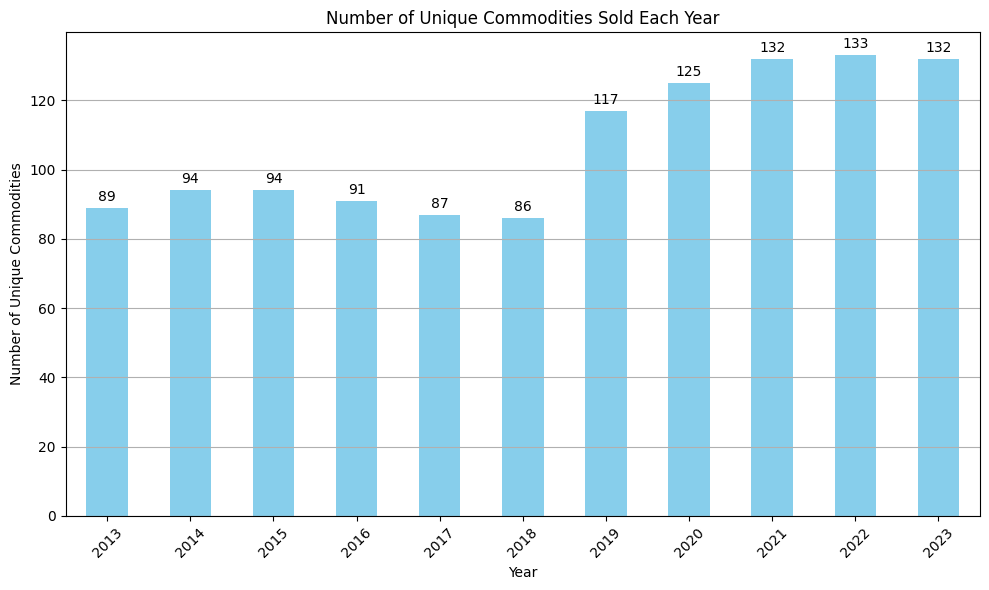

In [12]:
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime if it's not already in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group the data by year and count the number of unique commodities sold each year
commodities_per_year = df.groupby(df['Date'].dt.year)['Commodity'].nunique()

# Plot the bar graph
plt.figure(figsize=(10, 6))
bars = commodities_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Unique Commodities Sold Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Unique Commodities')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add grid lines only on the y-axis

# Annotate each bar with its count value
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'),
                 (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()),
                 ha='center', va='center',
                 size=10, xytext=(0, 8),
                 textcoords='offset points')

plt.tight_layout()
plt.show()


In 2022 there were 133 commodities but in 2023 there were only 132 commodities. Find the commoditieswhich is sold in 2022 but not in 2023.

In [13]:
# Group the data by year and get the set of unique commodities sold each year
commodities_2022 = set(df[df['Date'].dt.year == 2022]['Commodity'].unique())
commodities_2023 = set(df[df['Date'].dt.year == 2023]['Commodity'].unique())

# Find the commodity sold in 2022 but not in 2023
commodity_difference = commodities_2022 - commodities_2023

# Print the commodity that was sold in 2022 but not in 2023
print("Commodity sold in 2022 but not in 2023:", commodity_difference)


Commodity sold in 2022 but not in 2023: {'Sweet Lime'}


# Yearly average price of Potato Red

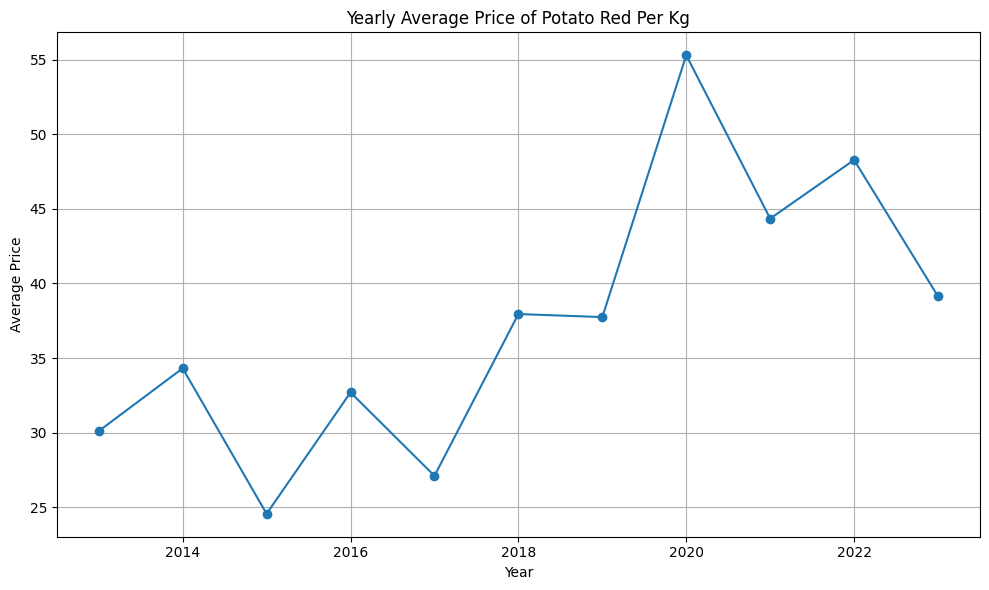

In [14]:
# Filter the DataFrame for "Potato Red" commodity
potato_red_df = df[df['Commodity'] == 'Potato Red']

# Group by year and month, calculate the average price for each month
monthly_avg_price = potato_red_df.groupby([potato_red_df['Date'].dt.year, potato_red_df['Date'].dt.month])['Average'].mean()

# Group by year, calculate the average price for each year
yearly_avg_price = monthly_avg_price.groupby(level=0).mean()

# Plot the yearly average prices
plt.figure(figsize=(10, 6))
yearly_avg_price.plot(marker='o', linestyle='-')
plt.title('Yearly Average Price of Potato Red Per Kg')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.tight_layout()
plt.show()


# Monthly Average Price of Potato Red



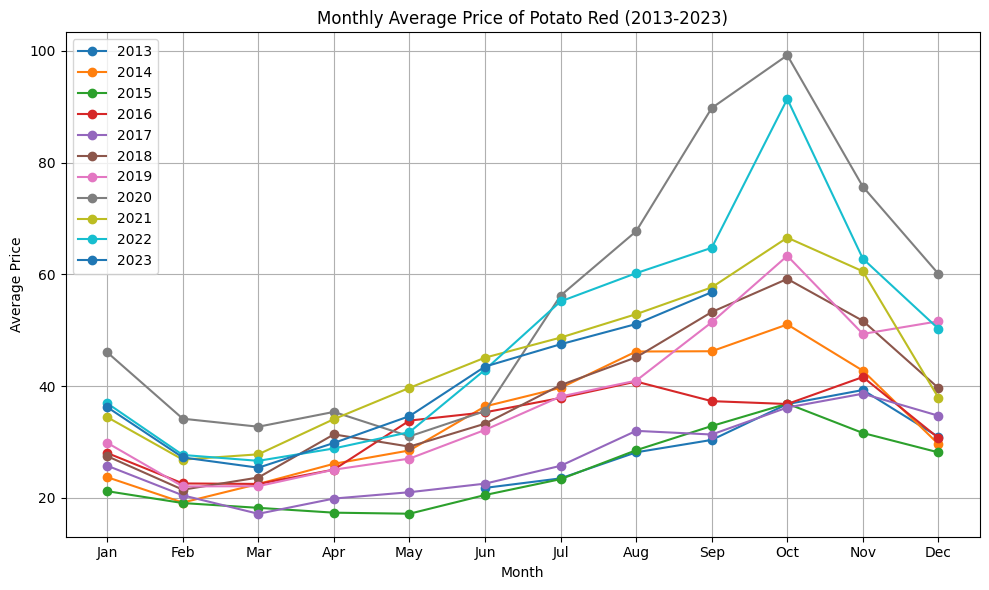

In [15]:
# Filter the DataFrame for "Potato Red" commodity and years 2013 to 2023
potato_red_df = df[(df['Commodity'] == 'Potato Red') & (df['Date'].dt.year.between(2013, 2023))]

# Group by year and month, calculate the average price for each month
monthly_avg_price = potato_red_df.groupby([potato_red_df['Date'].dt.year, potato_red_df['Date'].dt.month])['Average'].mean()

# Plot the monthly average prices for each year
plt.figure(figsize=(10, 6))
for year in range(2013, 2024):
    yearly_avg_price = monthly_avg_price.xs(year)
    plt.plot(yearly_avg_price.index, yearly_avg_price.values, marker='o', linestyle='-', label=year)

plt.title('Monthly Average Price of Potato Red (2013-2023)')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


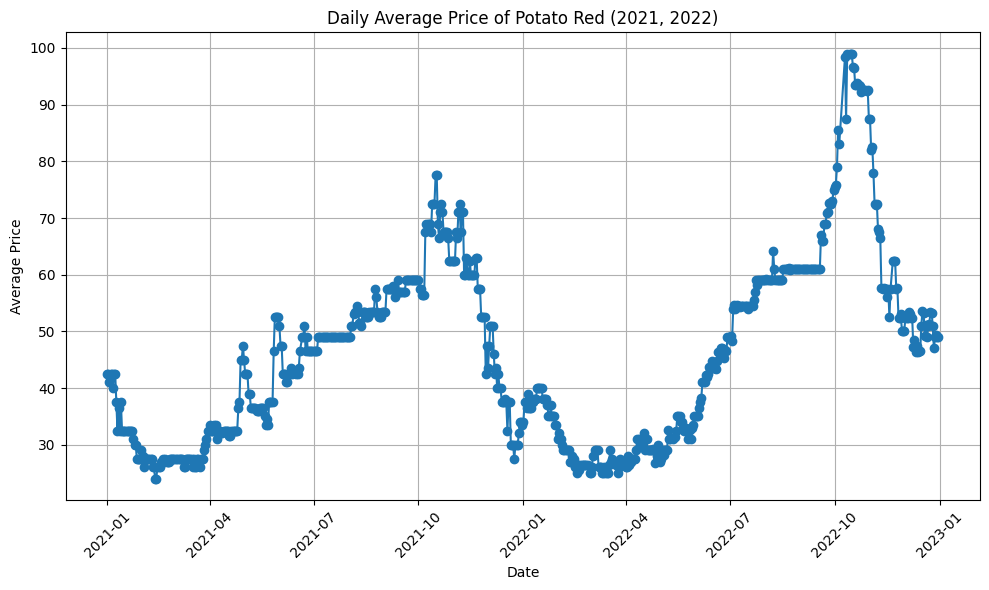

In [16]:
def plot_daily_avg_price(df, commodity, years):
    # Filter the DataFrame for the specified commodity and years
    filtered_df = df[(df['Commodity'] == commodity) & (df['Date'].dt.year.isin(years))]

    # Group by date and calculate the average price for each day
    daily_avg_price = filtered_df.groupby(filtered_df['Date'].dt.date)['Average'].mean()

    # Plot the daily average prices
    plt.figure(figsize=(10, 6))
    plt.plot(daily_avg_price.index, daily_avg_price.values, marker='o', linestyle='-')
    plt.title(f'Daily Average Price of {commodity} ({", ".join(map(str, years))})')
    plt.xlabel('Date')
    plt.ylabel('Average Price')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#call the function
plot_daily_avg_price(df, 'Potato Red', [2021, 2022])


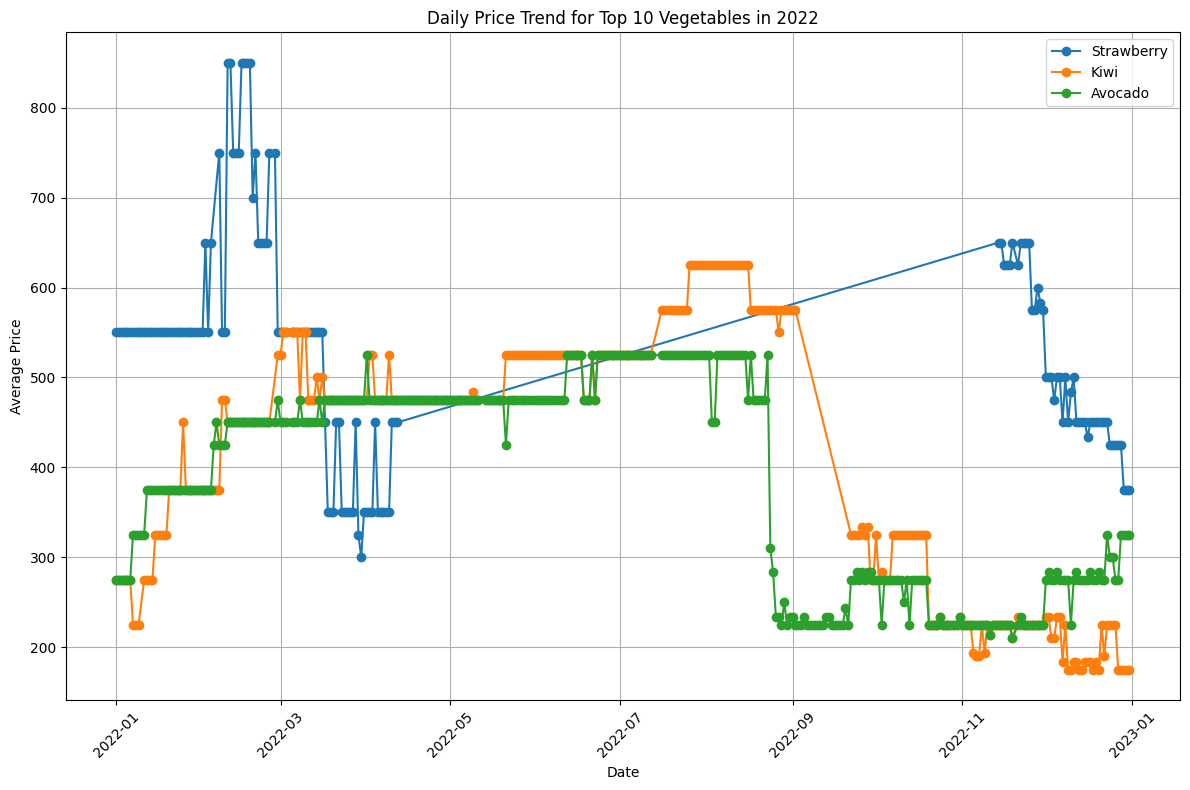

In [17]:
# Calculate the average price for each vegetable
average_price_per_vegetable = df.groupby('Commodity')['Average'].mean()

# Select the top 10 vegetables with the highest average prices
top_10_vegetables = average_price_per_vegetable.nlargest(3)

# Filter the DataFrame for the top 10 vegetables and the year 2022
top_10_df_2022 = df[(df['Commodity'].isin(top_10_vegetables.index)) & (df['Date'].dt.year == 2022)]

# Plot the daily trend for each of the top 10 vegetables in 2022
plt.figure(figsize=(12, 8))
for vegetable in top_10_vegetables.index:
    vegetable_data = top_10_df_2022[top_10_df_2022['Commodity'] == vegetable]
    daily_avg_price = vegetable_data.groupby(vegetable_data['Date'].dt.date)['Average'].mean()
    plt.plot(daily_avg_price.index, daily_avg_price.values, marker='o', label=vegetable)

plt.title('Daily Price Trend for Top 10 Vegetables in 2022')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


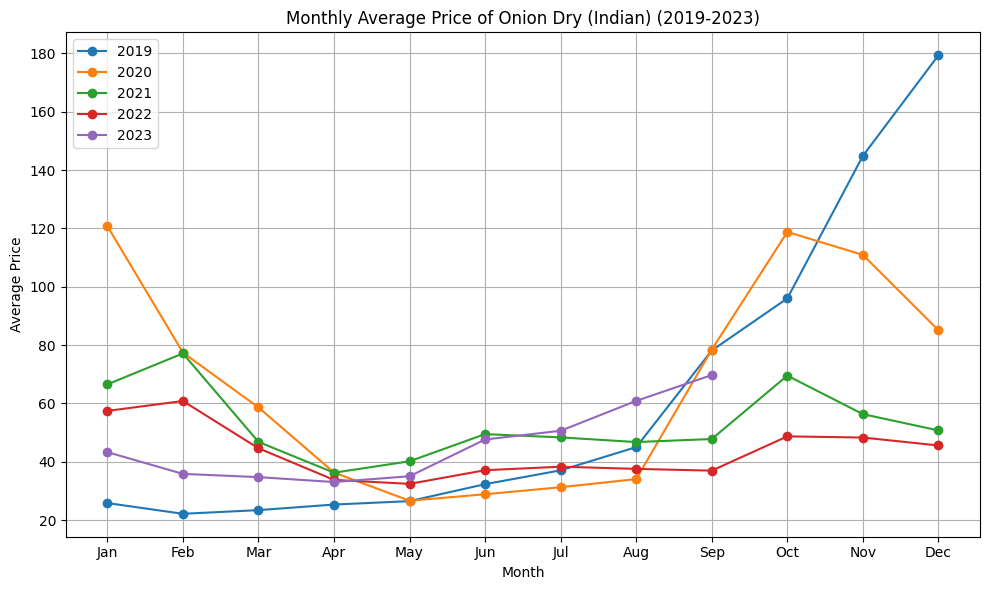

In [19]:
def plot_monthly_avg_price(df, commodity, start_year, end_year):
    # Filter the DataFrame for the specified commodity and years
    filtered_df = df[(df['Commodity'] == commodity) & (df['Date'].dt.year.between(start_year, end_year))]

    # Group by year and month, calculate the average price for each month
    monthly_avg_price = filtered_df.groupby([filtered_df['Date'].dt.year, filtered_df['Date'].dt.month])['Average'].mean()

    # Plot the monthly average prices for each year
    plt.figure(figsize=(10, 6))
    for year in range(start_year, end_year + 1):
        yearly_avg_price = monthly_avg_price.xs(year)
        plt.plot(yearly_avg_price.index, yearly_avg_price.values, marker='o', linestyle='-', label=year)

    plt.title(f'Monthly Average Price of {commodity} ({start_year}-{end_year})')
    plt.xlabel('Month')
    plt.ylabel('Average Price')
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the function
plot_monthly_avg_price(df, 'Onion Dry (Indian)', 2019, 2023)


# Claculate the monthly change in price for Commodities

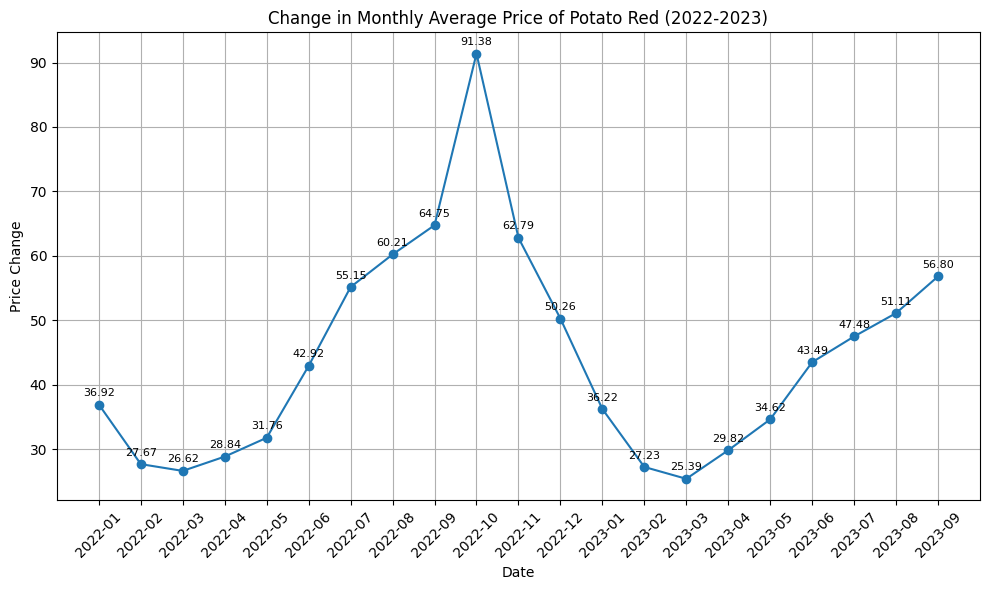

In [32]:
import matplotlib.pyplot as plt

def plot_price_changes(df, commodity, start_year, end_year):
    # Filter the DataFrame for the specified commodity and years
    filtered_df = df[(df['Commodity'] == commodity) & (df['Date'].dt.year.between(start_year, end_year))]

    # Group by year and month, calculate the average price for each month
    monthly_avg_price = filtered_df.groupby([filtered_df['Date'].dt.year, filtered_df['Date'].dt.month])['Average'].mean()

    # Calculate the changes in average prices
    price_changes = {}
    for year in monthly_avg_price.index.levels[0]:
        year_avg_prices = monthly_avg_price.xs(year)
        for month in range(1, 13):
            if month in year_avg_prices.index:
                if (year, month) not in price_changes:
                    price_changes[(year, month)] = year_avg_prices[month]
                else:
                    price_changes[(year, month)] = year_avg_prices[month] - price_changes[(year, month-1)]

    # Extract years and months from the price_changes keys
    years = [date[0] for date in price_changes.keys()]
    months = [date[1] for date in price_changes.keys()]

    # Create a list of dates
    dates = [f"{year}-{month:02}" for year, month in zip(years, months)]

    # Plot the changes in average prices over time
    plt.figure(figsize=(10, 6))
    plt.plot(dates, price_changes.values(), marker='o', linestyle='-')
    plt.title(f'Change in Monthly Average Price of {commodity} ({start_year}-{end_year})')
    plt.xlabel('Date')
    plt.ylabel('Price Change')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()

    # Annotate each point with its corresponding value
    for date, value in zip(dates, price_changes.values()):
        plt.text(date, value + 1, f'{value:.2f}', ha='center', va='bottom', fontsize=8)  # Adjust the value by adding 1

    plt.show()

# Example usage:
plot_price_changes(df, 'Potato Red', 2022, 2023)


- 2022-01: The price increased by approximately 36.92 compared to December 2021.
- 2022-02: The price decreased by approximately 27.67 compared to January 2022.
- 2022-03: The price decreased by approximately 26.62 compared to February 2022.
- 2022-04: The price increased by approximately 28.84 compared to March 2022.
- 2022-05: The price increased by approximately 31.76 compared to April 2022.
- 2022-06: The price increased by approximately 42.92 compared to May 2022.
- 2022-07: The price increased by approximately 55.15 compared to June 2022.
- 2022-08: The price increased by approximately 60.21 compared to July 2022.
- 2022-09: The price increased by approximately 64.75 compared to August 2022.
- 2022-10: The price increased by approximately 91.38 compared to September 2022.
- 2022-11: The price decreased by approximately 62.79 compared to October 2022.
- 2022-12: The price decreased by approximately 50.26 compared to November 2022.
- 2023-01: The price decreased by approximately 36.22 compared to December 2022.
- 2023-02: The price decreased by approximately 27.23 compared to January 2023.
- 2023-03: The price decreased by approximately 25.39 compared to February 2023.
- 2023-04: The price increased by approximately 29.82 compared to March 2023.
- 2023-05: The price increased by approximately 34.62 compared to April 2023.
- 2023-06: The price increased by approximately 43.49 compared to May 2023.
- 2023-07: The price increased by approximately 47.48 compared to June 2023.
- 2023-08: The price increased by approximately 51.11 compared to July 2023.


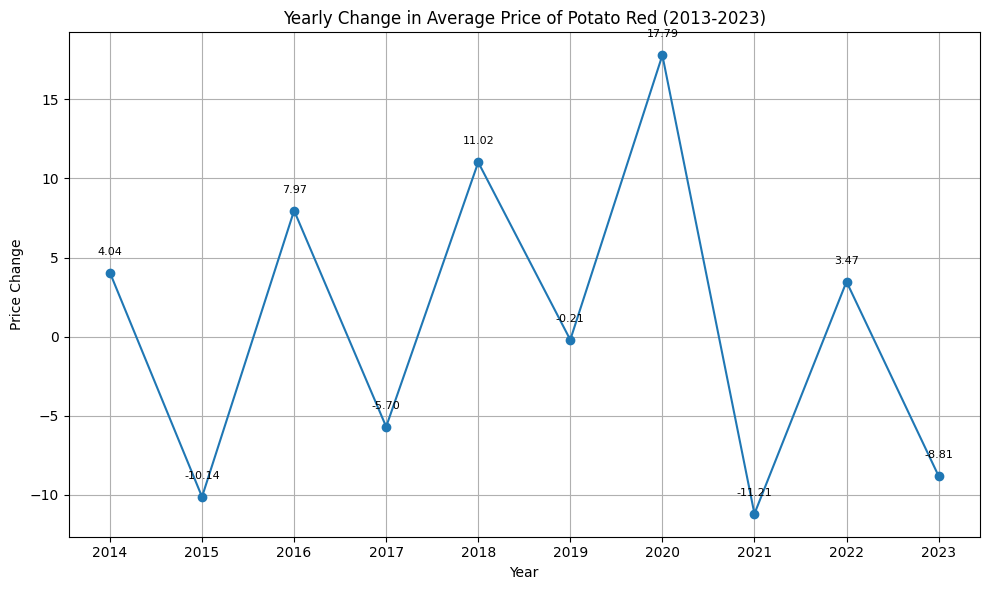

2014: 4.037786470600285
2015: -10.138744606590269
2016: 7.966727716727721
2017: -5.703646919652588
2018: 11.022608261341201
2019: -0.20661157024793653
2020: 17.791292882201972
2021: -11.21002566457112
2022: 3.4697923824558146
2023: -8.812746774864749


In [36]:
import matplotlib.pyplot as plt

def plot_yearly_price_change(df, commodity, start_year, end_year):
    # Filter the DataFrame for the specified commodity and years
    filtered_df = df[(df['Commodity'] == commodity) & (df['Date'].dt.year.between(start_year, end_year))]

    # Group by year and calculate the average price for each year
    yearly_avg_price = filtered_df.groupby(filtered_df['Date'].dt.year)['Average'].mean()

    # Calculate the yearly change in average prices
    yearly_price_change = {}
    for year in range(start_year + 1, end_year + 1):
        yearly_price_change[year] = yearly_avg_price[year] - yearly_avg_price[year - 1]

    # Plot the yearly price changes
    plt.figure(figsize=(10, 6))
    plt.plot(list(yearly_price_change.keys()), list(yearly_price_change.values()), marker='o', linestyle='-')
    plt.title(f'Yearly Change in Average Price of {commodity} ({start_year}-{end_year})')
    plt.xlabel('Year')
    plt.ylabel('Price Change')
    plt.xticks(range(start_year + 1, end_year + 1))
    plt.grid(True)
    plt.tight_layout()

    # Annotate each point with its corresponding value
    for year, change in yearly_price_change.items():
        plt.text(year, change + 1, f'{change:.2f}', ha='center', va='bottom', fontsize=8)

    plt.show()

    # Print out the yearly price changes
    for year, change in yearly_price_change.items():
        print(f"{year}: {change}")

# Example usage:
plot_yearly_price_change(df, 'Potato Red', 2013, 2023)


- 2014: The average price increased by approximately 4.04 compared to 2013.
- 2015: The average price decreased by approximately 10.14 compared to 2014.
- 2016: The average price increased by approximately 7.97 compared to 2015.
- 2017: The average price decreased by approximately 5.70 compared to 2016.
- 2018: The average price increased by approximately 11.02 compared to 2017.
- 2019: The average price decreased by approximately 0.21 compared to 2018.
- 2020: The average price increased by approximately 17.79 compared to 2019.
- 2021: The average price decreased by approximately 11.21 compared to 2020.
- 2022: The average price increased by approximately 3.47 compared to 2021.
- 2023: The average price decreased by approximately 8.81 compared to 2022.

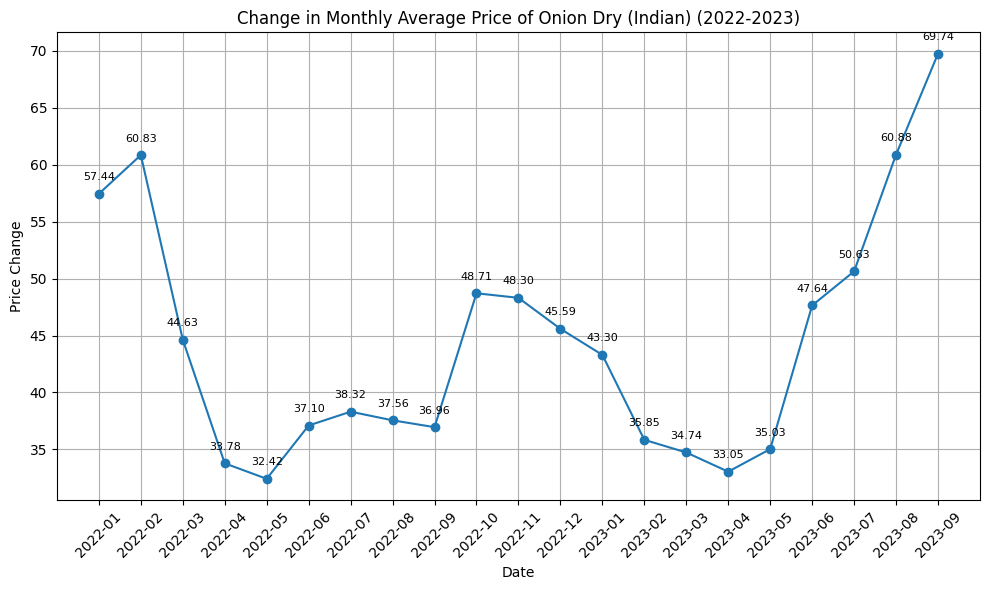

In [38]:
# Example usage:
plot_price_changes(df, 'Onion Dry (Indian)', 2022, 2023)

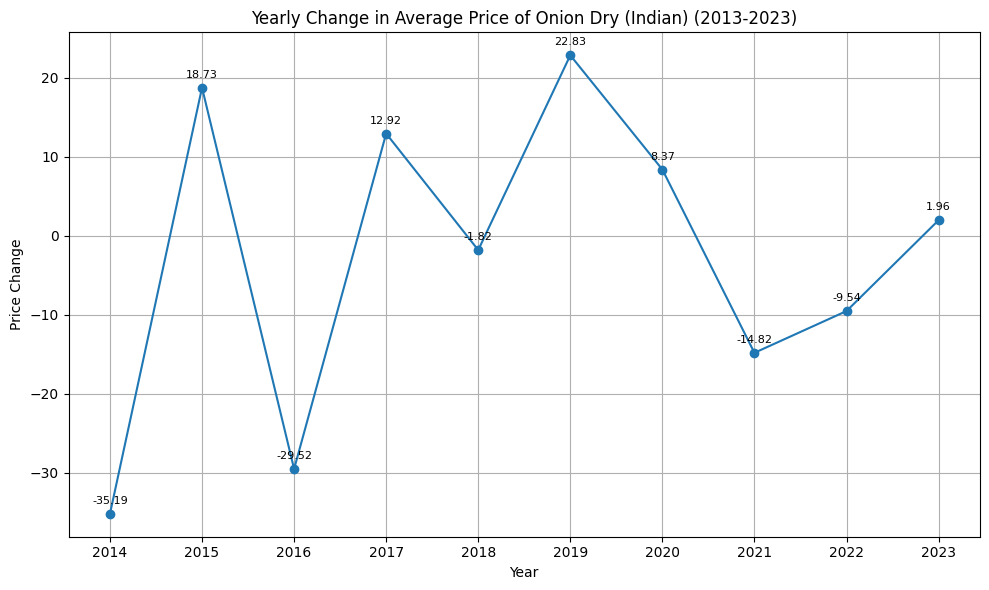

2014: -35.18893235300141
2015: 18.726486565714865
2016: -29.51750101750102
2017: 12.921458145254178
2018: -1.8197114071438065
2019: 22.825531865638823
2020: 8.366700787963907
2021: -14.821709237624766
2022: -9.538598657986675
2023: 1.956111776181615


In [37]:
# Example usage:
plot_yearly_price_change(df, 'Onion Dry (Indian)', 2013, 2023)